In [1]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import pandas as pd

In [2]:
release_zone = "test_4000"
number_particles = 100000
start_year = 2009
start_month = 3
start_day = 1
runtime_in_days = 42

In [3]:
plt.rcParams.update({'font.size': 14})

In [4]:
#SIGMA=xr.open_dataset('../data/config/ROMS/sigma2depth_parent.nc')
INALT_mask=xr.open_dataset('/gxfs_work/geomar/smomw044/prep_data_iAtlantic_LMock/INALT20.L46-KFS119/1_INALT20.L46-KFS119_mesh_mask_iMirabilis.nc')
SIGMA=xr.open_dataset('../data/config/ROMS/sigma2depth_parent.nc')
SIGMA_child=xr.open_dataset('../data/config/ROMS/sigma2depth_child.nc')

In [5]:
#Calculate bottom topography in INALT
topo_INALT = np.sum((INALT_mask.tmask*INALT_mask.e3t_0).isel(t=0),axis=0)
topo_INALT = topo_INALT.assign_coords({"lon": INALT_mask.glamt.isel(t=0,y=0)})
topo_INALT = topo_INALT.assign_coords({"lat": INALT_mask.gphit.isel(t=0,x=0)})
topo_INALT = topo_INALT.swap_dims({'x': 'lon'})
topo_INALT = topo_INALT.swap_dims({'y': 'lat'})

In [6]:
#Bottom topography in both ROMS
topo_ROMS = SIGMA['h']
topo_ROMS = topo_ROMS.rename({'lat_rho': 'lat','lon_rho': 'lon'})
topo_ROMS_child = SIGMA_child['h']
topo_ROMS_child = topo_ROMS_child.rename({'lat_rho': 'lat','lon_rho': 'lon'})

In [7]:
def load_release_locations(release_locations_file):
    df = pd.read_csv(release_locations_file, delimiter=",")
    df = df.set_index("release_zone")
    df.index = df.index.str.lower().str.replace(' ', '-').str.replace("'", '-')
    return df

In [8]:
release_locations = load_release_locations(release_locations_file = "../data/config/test_stations.csv")
bathymodiolus_lat, bathymodiolus_lon, release_depth = release_locations.loc[release_zone]

bathymodiolus_lat, bathymodiolus_lon, release_depth

(-23.25, 8.25, 4000.0)

In [9]:
#Depths of levels in INALT and ROMS
INALT_levels = INALT_mask.gdept_0
INALT_levels = INALT_levels.isel(y=0,t=0,x=0)

ROMS_levels = SIGMA.hs.where(SIGMA.hs<7000)
ROMS_levels = ROMS_levels.isel(lat_rho=128).sel(lon_rho=slice(7.559,8.858,None))

ROMS_child_levels = SIGMA_child.hs.where(SIGMA_child.hs<7000)
ROMS_child_levels = ROMS_child_levels.isel(lat_rho=140).sel(lon_rho=slice(7.559,8.858,None))

In [10]:
SIGMA.hs.where(SIGMA.hs<7000).max()

<xarray.DataArray 'hs' ()>
array(4843.41601562)

In [11]:
#Ewing Seamount Profile along latitude where the tip if the seamount is located
topo_INALT_bar=topo_INALT.isel(lat=295).sel( #-23.24
               lon=slice(7.559,
                         8.858,None))
topo_INALT_bar=-(topo_INALT_bar-INALT_levels.max()) #reverse so that bar plot works

topo_ROMS_bar=topo_ROMS.isel(lat=128).sel( #-23.24
             lon=slice(7.559,
                         8.858,None))
topo_ROMS_bar=-(topo_ROMS_bar-ROMS_levels.max())#SIGMA.hs.where(SIGMA.hs<7000).max())

topo_ROMS_child_bar=topo_ROMS_child.isel(lat=140).sel( #-23.24
               lon=slice(7.559,
                         8.858,None))
topo_ROMS_child_bar=-(topo_ROMS_child_bar-ROMS_child_levels.max())#SIGMA_child.hs.where(SIGMA_child.hs<7000).max())

In [12]:
topo_INALT.sel(lon=slice(7.5,9),lat=slice(-24,-23)).where(
    topo_INALT.sel(lon=slice(7.5,9),lat=slice(-24,-23))==topo_INALT.sel(lon=slice(7.5,9),lat=slice(-24,-23)).min(),drop=True)

<xarray.DataArray (lat: 1, lon: 1)>
array([[874.94332713]])
Coordinates:
  * lon      (lon) float32 8.3
  * lat      (lat) float32 -23.19

In [47]:
topo_ROMS_bar_interp = topo_ROMS_bar.interp(lon=np.linspace(7.559,8.848,8800))
topo_ROMS_child_bar_interp = topo_ROMS_child_bar.interp(lon=np.linspace(7.559,8.848,2650))

In [50]:
topo_ROMS_child_bar_interp.sel(lon=slice(8.18,8.375))

<xarray.DataArray (lon: 400)>
array([2987.86133374, 2990.03565027, 2992.2099668 , 2995.4240409 ,
       2999.42317499, 3003.42230907, 3007.42144315, 3011.42057723,
       3015.41971132, 3019.4188454 , 3023.41797948, 3027.41711356,
       3031.41624765, 3036.70165132, 3043.29400742, 3049.88636353,
       3056.47871963, 3063.07107573, 3069.66343183, 3076.25578793,
       3082.84814404, 3089.44050014, 3096.03285624, 3103.44326631,
       3111.97305023, 3120.50283415, 3129.03261807, 3137.56240199,
       3146.09218591, 3154.62196983, 3163.15175375, 3171.68153767,
       3180.21132159, 3188.95649286, 3198.10438515, 3207.25227743,
       3216.40016971, 3225.54806199, 3234.69595427, 3243.84384656,
       3252.99173884, 3262.13963112, 3271.2875234 , 3280.20254977,
       3288.50269242, 3296.80283507, 3305.10297772, 3313.40312037,
       3321.70326302, 3330.00340567, 3338.30354832, 3346.60369096,
       3354.90383361, 3362.81702176, 3369.19117564, 3375.56532952,
       3381.9394834 , 3388.31363727, 3394.68779115, 3401.06194503,
       3407.43609891, 3413.81025278, 3420.18440666, 3426.33870906,
       3430.98361607, 3435.62852307, 3440.27343007, 3444.91833707,
       3449.56324408, 3454.20815108, 3458.85305808, 3463.49796508,
       3468.14287208, 3472.76851167, 3477.05234955, 3481.33618743,
       3485.62002531, 3489.90386319, 3494.18770107, 3498.47153895,
...
       3486.50040319, 3484.19894955, 3481.89749591, 3479.59604227,
       3477.29458862, 3475.07488174, 3473.17206188, 3471.26924203,
       3469.36642217, 3467.46360231, 3465.56078246, 3463.6579626 ,
       3461.75514275, 3459.85232289, 3457.94950303, 3456.17101926,
       3455.21521669, 3454.25941412, 3453.30361155, 3452.34780898,
       3451.39200641, 3450.43620384, 3449.48040127, 3448.5245987 ,
       3447.56879613, 3446.59676314, 3445.35877724, 3444.12079134,
       3442.88280544, 3441.64481954, 3440.40683364, 3439.16884774,
       3437.93086184, 3436.69287594, 3435.45489004, 3434.21690414,
       3431.03248224, 3427.8158928 , 3424.59930337, 3421.38271393,
       3418.1661245 , 3414.94953506, 3411.73294563, 3408.51635619,
       3405.29976676, 3402.08317732, 3397.01639318, 3391.76654968,
       3386.51670618, 3381.26686268, 3376.01701919, 3370.76717569,
       3365.51733219, 3360.26748869, 3355.0176452 , 3349.7678017 ,
       3343.27065671, 3336.52916889, 3329.78768107, 3323.04619326,
       3316.30470544, 3309.56321762, 3302.82172981, 3296.08024199,
       3289.33875417, 3282.59726636, 3274.63780359, 3266.2987983 ,
       3257.95979301, 3249.62078772, 3241.28178244, 3232.94277715,
       3224.60377186, 3216.26476657, 3207.92576129, 3199.586756  ,
       3190.10225423, 3180.09508844, 3170.08792266, 3160.08075687])
Coordinates:
    lat      float32 -23.24
    lat_rho  float32 -23.24
  * lon      (lon) float64 8.18 8.181 8.181 8.182 ... 8.373 8.374 8.374 8.375

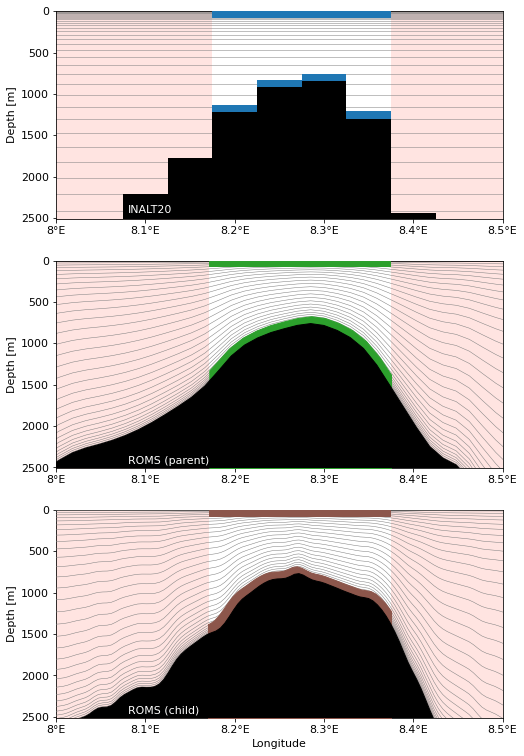

In [59]:
#Fuer retention
plt.rcParams.update({'font.size': 11})
plt.rcParams['font.family'] = 'Arial'

plt.figure(figsize=(8,13))
plt.subplot(3,1,1)
plt.fill_between(np.linspace(7.6,8.17284,5),INALT_levels.max()-5000,INALT_levels.max(),color='mistyrose')
plt.fill_between(np.linspace(8.375,9,5),INALT_levels.max()-5000,INALT_levels.max(),color='mistyrose')
for i in INALT_levels:
    plt.plot(np.linspace(7.6,8.85,2),[-(i-INALT_levels.max()),-(i-INALT_levels.max())],color='grey',linewidth='0.5')
plt.bar(np.linspace(8.2,8.35,4),topo_INALT_bar.sel(lon=slice(8.15,8.37))+100,width=0.05,zorder=10)
plt.bar(np.linspace(7.6,8.85,26),topo_INALT_bar,width=0.05,label='INALT',color='black',zorder=11)
plt.yticks(np.linspace(INALT_levels.max()-4500,INALT_levels.max(),9),[int(i) for i in np.linspace(4000,0,9)])
plt.xticks([8,8.1,8.2,8.3,8.4,8.5],['8°E','8.1°E','8.2°E','8.3°E','8.4°E','8.5°E'])
plt.text(8.08,3130,'INALT20',color='white',zorder=12)

plt.ylabel('Depth [m]')
plt.xlim([8,8.5])
plt.ylim([3050,INALT_levels.max()])
plt.fill_between(np.linspace(8.175,8.374,5),INALT_levels.max()-80,INALT_levels.max(),color='tab:blue',zorder=10)

plt.subplot(3,1,2)
#plt.fill_between(np.linspace(7.559,8.848,88), 0, topo_ROMS_bar+100,color='tab:green')
plt.fill_between(np.linspace(8.1715,8.375,1331), 0, topo_ROMS_bar_interp.sel(lon=slice(8.18,8.375))+100,color='tab:green',zorder=14)

plt.fill_between(np.linspace(7.6,8.17,5),ROMS_levels.max()-5000,ROMS_levels.max(),color='mistyrose')
plt.fill_between(np.linspace(8.375,9,5),ROMS_levels.max()-5000,ROMS_levels.max(),color='mistyrose')
plt.fill_between(np.linspace(7.559,8.848,88), 0, topo_ROMS_bar,color='black',label='ROMS parent',zorder=15)
plt.xticks([8,8.1,8.2,8.3,8.4,8.5],['8°E','8.1°E','8.2°E','8.3°E','8.4°E','8.5°E'])
plt.ylabel('Depth [m]')
plt.yticks(np.linspace(ROMS_levels.max()-4500,ROMS_levels.max(),9),[int(i) for i in np.linspace(4000,0,9)])
plt.fill_between(np.linspace(8.171,8.374,5),ROMS_levels.max()-80,ROMS_levels.max(),color='tab:green',zorder=10)
plt.ylim([3050-(INALT_levels.max()-ROMS_levels.max()),ROMS_levels.max()])
plt.xlim([8,8.5])
plt.text(8.08,1880,'ROMS (parent)',color='white',zorder=15)
for i in [int(j) for j in np.linspace(0,len(ROMS_levels.slev)-1,len(ROMS_levels.slev))]:
    plt.plot(np.linspace(7.559,8.848,88),-(ROMS_levels.isel(slev=i)-ROMS_levels.max()),color='grey',linewidth='0.5')

plt.subplot(3,1,3)
plt.fill_between(np.linspace(8.17,8.375,400), 0, topo_ROMS_child_bar_interp.sel(lon=slice(8.18,8.375))+100,color='tab:brown',zorder=13)
plt.fill_between(np.linspace(7.6,8.17,5),ROMS_child_levels.max()-5000,ROMS_child_levels.max(),color='mistyrose')
plt.fill_between(np.linspace(8.375,9,5),ROMS_child_levels.max()-5000,ROMS_child_levels.max(),color='mistyrose')
plt.fill_between(np.linspace(7.559,8.848,265), 0, topo_ROMS_child_bar,color='black',label='ROMS parent',zorder=14)
plt.xticks([8,8.1,8.2,8.3,8.4,8.5],['8°E','8.1°E','8.2°E','8.3°E','8.4°E','8.5°E'])
plt.xlabel('Longitude')
plt.ylabel('Depth [m]')
plt.yticks(np.linspace(ROMS_child_levels.max()-4500,ROMS_child_levels.max(),9),[int(i) for i in np.linspace(4000,0,9)])
plt.fill_between(np.linspace(8.171,8.374,5),ROMS_child_levels.max()-80,ROMS_child_levels.max(),color='tab:brown',zorder=13)
plt.ylim([3050-(INALT_levels.max()-ROMS_child_levels.max()),ROMS_child_levels.max()])
plt.xlim([8,8.5])
plt.text(8.08,1880,'ROMS (child)',color='white',zorder=15)
for i in [int(j) for j in np.linspace(0,len(ROMS_child_levels.slev)-1,len(ROMS_child_levels.slev))]:
    plt.plot(np.linspace(7.559,8.848,265),-(ROMS_child_levels.isel(slev=i)-ROMS_child_levels.max()),color='grey',linewidth='0.5',zorder=12)


plt.savefig('../output_data/retentionpotential_layers-lines.pdf', bbox_inches='tight');

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


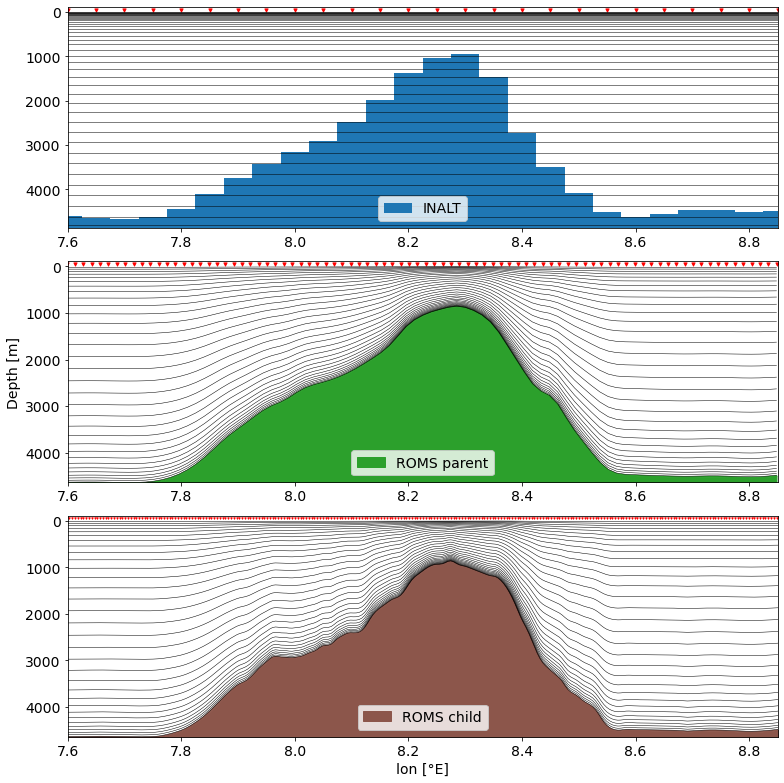

In [16]:
#Profile in INALT
plt.figure(figsize=(11,11))
plt.subplot(3,1,1)
plt.bar(np.linspace(7.6,8.85,26),topo_INALT_bar,width=0.05,label='INALT')
plt.yticks(np.linspace(INALT_levels.max()-4000,INALT_levels.max(),5),[int(i) for i in np.linspace(4000,0,5)],fontsize=14)
plt.scatter(topo_INALT_bar.lon,np.linspace(INALT_levels.max()+50,
                                                INALT_levels.max()+50,len(topo_INALT_bar.lon)),
           color='red',s=10,marker='v')
plt.xlim([7.6,8.85])
plt.ylim([1000,INALT_levels.max()+110])
plt.xticks([7.6,7.8,8,8.2,8.4,8.6,8.8],fontsize=14)
plt.legend(loc="lower center",fontsize=14)
for i in INALT_levels:
    plt.plot(np.linspace(7.6,8.85,2),[-(i-INALT_levels.max()),-(i-INALT_levels.max())],color='black',linewidth='0.5')

plt.subplot(3,1,2)    
plt.plot(np.linspace(7.559,8.848,88),topo_ROMS_bar,color='tab:green')
plt.fill_between(np.linspace(7.559,8.848,88), 0, topo_ROMS_bar,color='tab:green',label='ROMS parent')
plt.legend(loc="lower center",fontsize=14)
plt.scatter(topo_ROMS_bar.lon,np.linspace(ROMS_levels.max()+50,
                                                ROMS_levels.max()+50,len(topo_ROMS_bar.lon)),
           color='red',s=10,marker='v')
plt.xlim([7.6,8.85])
plt.xticks([7.6,7.8,8,8.2,8.4,8.6,8.8],fontsize=14)
plt.ylim([0,ROMS_levels.max()+110])
plt.ylabel('Depth [m]',fontsize=14)
plt.yticks(np.linspace(ROMS_levels.max()-4000,ROMS_levels.max(),5),[int(i) for i in np.linspace(4000,0,5)],fontsize=14)
for i in [int(j) for j in np.linspace(0,len(ROMS_levels.slev)-1,len(ROMS_levels.slev))]:
    plt.plot(np.linspace(7.559,8.848,88),-(ROMS_levels.isel(slev=i)-ROMS_levels.max()),color='black',linewidth='0.5')
    
plt.subplot(3,1,3)   
plt.plot(np.linspace(7.559,8.853,265),topo_ROMS_child_bar,color='tab:brown')
plt.fill_between(np.linspace(7.559,8.853,265), 0, topo_ROMS_child_bar,color='tab:brown',label='ROMS child')
plt.scatter(topo_ROMS_child_bar.lon,np.linspace(ROMS_child_levels.max()+50,
                                                ROMS_child_levels.max()+50,len(topo_ROMS_child_bar.lon)),
           color='red',s=2,marker='v')
plt.xlim([7.6,8.85])
plt.xticks([7.6,7.8,8,8.2,8.4,8.6,8.8],fontsize=14)
plt.xlabel('lon [°E]',fontsize=14)
plt.ylim([0,ROMS_child_levels.max()+110])
plt.legend(loc="lower center",fontsize=14)
plt.yticks(np.linspace(ROMS_child_levels.max()-4000,ROMS_child_levels.max(),5),[int(i) for i in np.linspace(4000,0,5)],fontsize=14)
for i in [int(j) for j in np.linspace(0,len(ROMS_child_levels.slev)-1,len(ROMS_child_levels.slev))]:
    plt.plot(np.linspace(7.559,8.853,265),-(ROMS_child_levels.isel(slev=i)-ROMS_child_levels.max()),color='black',linewidth='0.5')
plt.tight_layout();

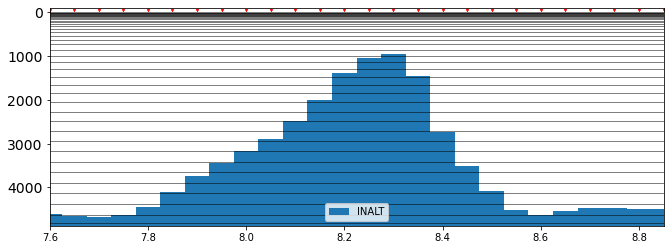

In [14]:
#Profile in INALT
plt.figure(figsize=(11,4))
plt.bar(np.linspace(7.6,8.85,26),topo_INALT_bar,width=0.05,label='INALT')
plt.yticks(np.linspace(INALT_levels.max()-4000,INALT_levels.max(),5),[int(i) for i in np.linspace(4000,0,5)],fontsize=14)
plt.scatter(topo_INALT_bar.lon,np.linspace(INALT_levels.max()+50,
                                                INALT_levels.max()+50,len(topo_INALT_bar.lon)),
           color='red',s=4,marker='v')
plt.xlim([7.6,8.85])
plt.ylim([1000,INALT_levels.max()+90])
plt.legend(loc="lower center")
for i in INALT_levels:
    plt.plot(np.linspace(7.6,8.85,2),[-(i-INALT_levels.max()),-(i-INALT_levels.max())],color='black',linewidth='0.5');

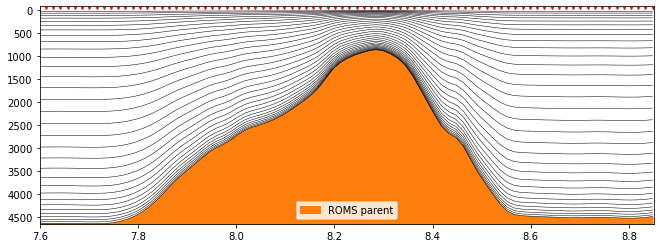

In [110]:
#Profile in ROMS parent
plt.figure(figsize=(11,4))
plt.plot(np.linspace(7.559,8.848,88),topo_ROMS_bar,color='tab:orange')
plt.fill_between(np.linspace(7.559,8.848,88), 0, topo_ROMS_bar,color='tab:orange',label='ROMS parent')
plt.legend(loc="lower center")
plt.scatter(topo_ROMS_bar.lon,np.linspace(ROMS_levels.max()+50,
                                                ROMS_levels.max()+50,len(topo_ROMS_bar.lon)),
           color='red',s=4,marker='v')
plt.xlim([7.6,8.85])
plt.ylim([0,ROMS_levels.max()+90])
plt.yticks(np.linspace(ROMS_levels.max()-4500,ROMS_levels.max(),10),[int(i) for i in np.linspace(4500,0,10)])
for i in [int(j) for j in np.linspace(0,len(ROMS_levels.slev)-1,len(ROMS_levels.slev))]:
    plt.plot(np.linspace(7.559,8.848,88),-(ROMS_levels.isel(slev=i)-ROMS_levels.max()),color='black',linewidth='0.5');

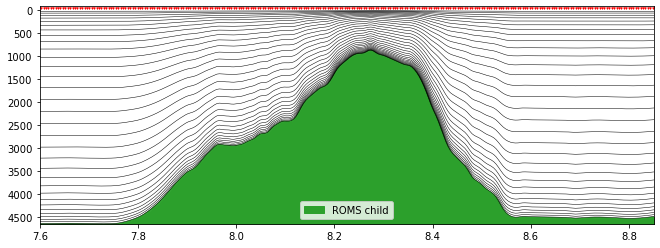

In [116]:
#Profile in ROMS child
plt.figure(figsize=(11,4))
plt.plot(np.linspace(7.559,8.853,265),topo_ROMS_child_bar,color='tab:green')
plt.fill_between(np.linspace(7.559,8.853,265), 0, topo_ROMS_child_bar,color='tab:green',label='ROMS child')
plt.scatter(topo_ROMS_child_bar.lon,np.linspace(ROMS_child_levels.max()+50,
                                                ROMS_child_levels.max()+50,len(topo_ROMS_child_bar.lon)),
           color='red',s=2,marker='v')
plt.xlim([7.6,8.85])
plt.ylim([0,ROMS_child_levels.max()+90])
plt.legend(loc="lower center")
plt.yticks(np.linspace(ROMS_child_levels.max()-4500,ROMS_child_levels.max(),10),[int(i) for i in np.linspace(4500,0,10)])
for i in [int(j) for j in np.linspace(0,len(ROMS_child_levels.slev)-1,len(ROMS_child_levels.slev))]:
    plt.plot(np.linspace(7.559,8.853,265),-(ROMS_child_levels.isel(slev=i)-ROMS_child_levels.max()),color='black',linewidth='0.5');

In [47]:
topo_ROMS_child_bar.lon

<xarray.DataArray 'lon' (lon: 265)>
array([7.55902 , 7.563921, 7.568823, ..., 8.843333, 8.848235, 8.853137],
      dtype=float32)
Coordinates:
  * lon      (lon) float32 7.559 7.564 7.569 7.574 ... 8.838 8.843 8.848 8.853
    lat      float32 -23.24
    lat_rho  float32 -23.24
Attributes:
    long_name:      longitude coordinate at rho points
    standard_name:  longitude
    units:          degrees_east

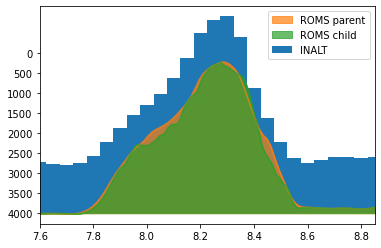

In [34]:
plt.bar(np.linspace(7.6,8.85,26),topo_INALT_bar,width=0.05,label='INALT')
plt.plot(np.linspace(7.559,8.848,88),topo_ROMS_bar,color='tab:orange',alpha=0.7)
plt.fill_between(np.linspace(7.559,8.848,88), 0, topo_ROMS_bar,color='tab:orange',label='ROMS parent',alpha=0.7)
plt.plot(np.linspace(7.559,8.853,265),topo_ROMS_child_bar,color='tab:green',alpha=0.7)
plt.fill_between(np.linspace(7.559,8.853,265), 0, topo_ROMS_child_bar,color='tab:green',label='ROMS child',alpha=0.7)
plt.xlim([7.6,8.85])
plt.legend()
plt.yticks(np.linspace(0,4000,9),[int(i) for i in np.linspace(4000,0,9)]);

In [39]:
topo_INALT_2325=topo_INALT.isel(lat=295).sel( #-23.24
               lon=slice(7.559,
                         8.858,None))
topo_INALT_2325=-(topo_INALT_2325-INALT_levels.max())

topo_ROMS_2325=topo_ROMS.isel(lat=128).sel( #-23.24
             lon=slice(7.559,
                         8.858,None))
topo_ROMS_2325=-(topo_ROMS_2325-ROMS_levels.max())

topo_ROMS_child_2325=topo_ROMS_child.isel(lat=140).sel( #-23.24
               lon=slice(7.559,
                         8.858,None))
topo_ROMS_child_2325=-(topo_ROMS_child_2325-ROMS_child_levels.max())

topo_ROMS_child_test1=topo_ROMS_child.isel(lat=156).sel( #-23.25
               lon=slice(7.559,
                         8.858,None))
topo_ROMS_child_test1=-(topo_ROMS_child_test1-topo_ROMS_child_test1.max())

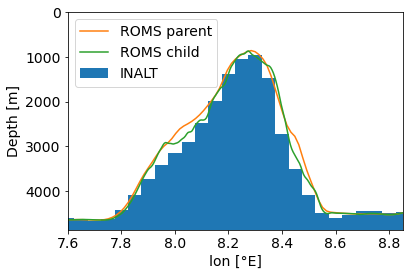

In [41]:
plt.bar(np.linspace(7.6,8.85,26),topo_INALT_2325,width=0.05,label='INALT')
plt.plot(np.linspace(7.559,8.848,88),topo_ROMS_2325+INALT_levels.max()-ROMS_levels.max(),label='ROMS parent',color='tab:orange')
plt.plot(np.linspace(7.559,8.853,265),topo_ROMS_child_2325+INALT_levels.max()-ROMS_child_levels.max(),label='ROMS child',color='tab:green')
plt.yticks(np.linspace(INALT_levels.max()-4000,INALT_levels.max(),5),[int(i) for i in np.linspace(4000,0,5)],fontsize=14)
plt.xlim([7.6,8.85])
plt.ylim([1000,INALT_levels.max()])
plt.xticks([7.6,7.8,8,8.2,8.4,8.6,8.8],fontsize=14)
plt.legend(fontsize=14)
plt.xlabel('lon [°E]',fontsize=14)
plt.ylabel('Depth [m]',fontsize=14);

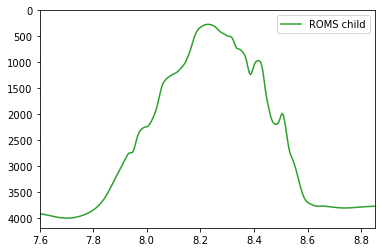

In [17]:
plt.plot(np.linspace(7.559,8.853,265),topo_ROMS_child_test1,color='tab:green',label='ROMS child')
plt.xlim([7.6,8.85])
plt.legend()
plt.yticks(np.linspace(0,4000,9),[int(i) for i in np.linspace(4000,0,9)]);